# Steel Defect Identification Project - Exploratory Data Analysis

Like with any data science task, before we can move on to prepping and modeling our data we need a thorough understanding of the data we are dealing with. This notebook records the data understanding component of the CRISP-DM process for this project. 

## 1. Importing the Necessary Libraries

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

## 2. Image Counts

In [2]:
# Getting the length of our train_images directory
train_filenames = list(os.walk('Original Dataset Package/Steel Images/train_images'))[0][2]

# Printing the result
print(f'There are {len(train_filenames)} images in our training set.')

There are 12568 images in our training set.


In [3]:
# Getting the length of our train_images directory
test_filenames = list(os.walk('Original Dataset Package/Steel Images/test_images'))[0][2]

# Printing the result
print(f'There are {len(test_filenames)} images in our test set.')

There are 5506 images in our test set.


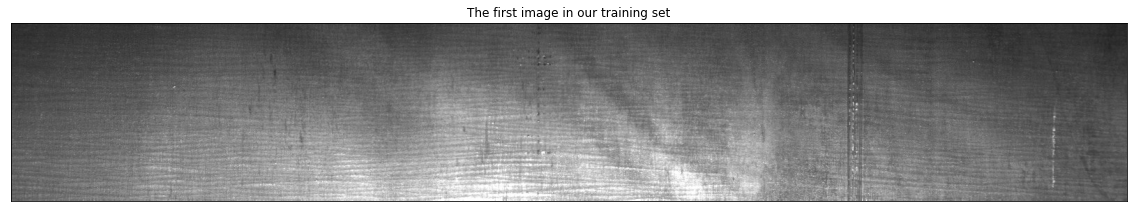

In [4]:
# Loading the first image in our training set using OpenCV
image_1 = cv2.imread('Original Dataset Package/Steel Images/train_images/58ee62fd7.jpg')

# Displaying the image
fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(image_1)
plt.xticks([])
plt.yticks([])
plt.title('The first image in our training set');

In [5]:
# Checking the resolution and number of channels for our first image
image_1.shape

(256, 1600, 3)

## 3. Checking Uniformity of Image Formats

In [6]:
# Defining our resolution_check function
def resolution_check(array):
    
    '''This function takes either of our two arrays of filenames and returns how many 
    images in each directory have a resolution of 1600x256 with 3 color channels, and
    how many images do not.'''
    
    result = {'1600 x 256 x 3':0, 'other':0}
    
    if len(array) > 5506:
        dir_name = 'train_images/'
    else:
        dir_name = 'test_images/'
    
    for filename in array:
        filepath = 'Original Dataset Package/Steel Images/' + dir_name + filename
        image = cv2.imread(filepath)
        if image.shape == (256, 1600, 3):
            result['1600 x 256 x 3'] = result['1600 x 256 x 3'] + 1
        else:
            result['other'] = result['other'] + 1
            
    
    return result

In [7]:
#### Un comment out this cell at end $$$$
# Running our format checking function on the training images
print(f'Training image formats - {resolution_check(train_filenames)}')

# Running it on our test images
print(f'Test image formats - {resolution_check(test_filenames)}')

Training image formats - {'1600 x 256 x 3': 12568, 'other': 0}
Test image formats - {'1600 x 256 x 3': 5506, 'other': 0}


## 4. Class Distributions

In [8]:
# Importing the train.csv as a pandas dataframe
train_df = pd.read_csv('Original Dataset Package/train.csv')

# Displaying the shape
print(f'train_df shape: {train_df.shape}')

# Taking a look at the head of our dataframe
train_df.head()

train_df shape: (7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [9]:
# Printing the number of unique file names in train_df, telling us the number of images with defects
print(f'There are {len(set(train_df["ImageId"]))} images in our training set with defects.')

# Subtracting 6666 from the number of total train images to find the count of images without defects
print(f'There are {len(train_filenames) - 6666} images in our training set without defects.')

There are 6666 images in our training set with defects.
There are 5902 images in our training set without defects.


In [10]:
# Comparing the number of images with defects, to the number of images without 
print(f'The 6666 images with defects makeup {round((6666 / len(train_filenames)) * 100, 2)}% of the total training images')
print(f'The 5902 images without defects makeup {round((5902 / len(train_filenames)) * 100, 2)}% of the total training images')

The 6666 images with defects makeup 53.04% of the total training images
The 5902 images without defects makeup 46.96% of the total training images


('0', 5902) ('1', 6239) ('2', 425) ('3', 2)


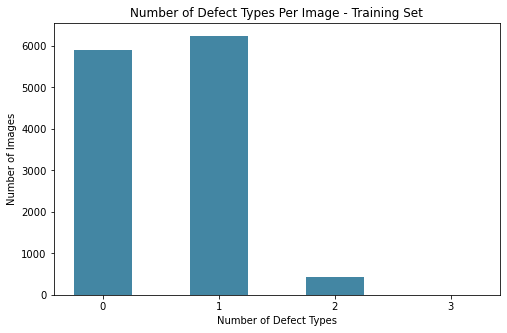

In [14]:
# Making a dictionary tying each filename to number of defect types for later use
defects_per_image_dict = dict(train_df['ImageId'].value_counts())

# This list holds the number of defect types for each unique filename in our dataframe
defects_per_image = list(train_df.ImageId.value_counts())

# The class labels of the defect types 
number_of_defect_types = ['0', '1', '2', '3']

# This list tracks number of defect types, '0' is preset to 5902 because there are 5902
# images in our training set with no defects present 
defect_type_counts = [5902, 0, 0, 0]

# Iterating through the defect type count list, tracking how many times each number appears
for i in defects_per_image:
    defect_type_counts[i] += 1
    
# Printing the results (so we can see how many have 3 labels)
print(*list(zip(number_of_defect_types, defect_type_counts)))
    
# Plotting the results
fig, ax  = plt.subplots(figsize=(8,5))
plt.bar(number_of_defect_types, defect_type_counts, width=.5, color='#4386a3')
plt.title('Number of Defect Types Per Image - Training Set')
plt.xlabel('Number of Defect Types')
plt.ylabel('Number of Images');

This chart tells us that in our training set, there are:
* 5902 images with no defects 
* 6239 images with one class of defect
* 425 images with two classes of defects
* 2 images with three classes of defects
* 0 images with four classes of defects

,ClassId
ClassLabel,
1,897
2,247
3,5150
4,801


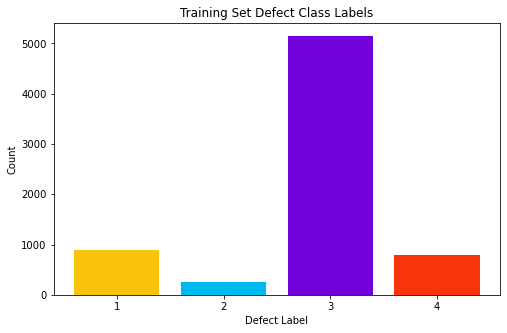

In [16]:
# Creating and sorting a dataframe that holds our class label distribution info
class_balance = pd.DataFrame(train_df.ClassId.value_counts())
class_balance['ClassLabel'] = [str(i) for i in class_balance.index]
class_balance.sort_values('ClassLabel', inplace=True)
class_balance.set_index(['ClassLabel'], inplace=True)

# Displaying our dataframe
display(class_balance)

# Color coding the different defect types, these colors will be consistent throughout the project
color_list = [ '#f9c20c', '#00b9f1', '#7200da', '#f9340c']

# Plotting the distribution
fig, ax = plt.subplots(figsize=(8,5))
plt.bar(class_balance.index, class_balance['ClassId'], color=color_list)
plt.title('Training Set Defect Class Labels')
plt.xlabel('Defect Label')
plt.ylabel('Count');

## 5. Visualizing Defect Masks by Defect Class

The following images come from kaggle user MaXXX (https://www.kaggle.com/finlay) and the original code that produced these images can be found at this link https://www.kaggle.com/finlay/clear-mask-visualization-and-simple-eda. 

Due to time constraints, I did not have a chance to go through the process of taking sample images from each class of defect and visualizing which pixels are responsible for that class of defect. I felt however that this step would be a significant value add for the EDA portion of this project, so I have included images from another kaggle user.

## Final Thoughts

This EDA step has shown that the problem at hand is a complex one. My ultimate goal for this specific image classification problem is to not only train a neural network to determine which images do or do not show defects, but also to accurately identify which class of defect is present (multiclass classification) and recognize which pixels in each image are responsible for that specific class of defect. 

In [1]:
### hahahaha big changes